In [2]:
import pickle
import pandas as pd

In [3]:
df_1 = pickle.load(open('./Data/cleaned_call_for_service_1','rb'))
df_2 = pickle.load(open('./Data/cleaned_call_for_service_2','rb'))
df_3 = pickle.load(open('./Data/cleaned_call_for_service_3','rb'))

In [4]:
df = pd.concat([df_1,df_2,df_3])

In [5]:
df.shape

(1407125, 22)

In [6]:
df.loc[0]

Incident Number                    130023841
Call Type                         Loud Music
Location                     3000BLK MAIN ST
Beat                                    A002
Reporting District                      02D1
Received Time         03/01/2013 12:00:40 AM
Disposition                          Advisal
Latitude                             33.9983
Longitude                            -118.48
time mark                              False
received time            2013-03-01 12:00:40
cleared time             2013-03-01 12:09:57
Line_Open                              False
Month                                      3
Year                                    2013
Day_Of_Week                                4
Day_Delta                              -1176
Solving Time                            9.28
incident date            2013-03-01 00:00:00
Violent                                    0
Larceny                                    0
Check                                      0
Name: 0, d

In [7]:
import datetime
open_date = datetime.datetime(2016, 5, 20)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Crime Type 

In [9]:
df.loc[df['Larceny'] == 1,'Call Type'].value_counts()

Audible Burglar Alarm                  51330
Petty Theft Report                     12895
Auto Burglary Report                   10597
Burglary Report                         9892
Lost Property                           8136
Identity Theft                          6388
Petty Theft Just Occurred               6115
Grand Theft Report                      5423
Bike Theft Report                       4830
Grand Theft Auto Report                 3761
Theft Suspect in Custody                2798
Vehicle Burglar Alarm                   2389
Petty Theft Now                          939
Attempt Burglary Report                  840
Burglary Just Occurred                   775
Auto Burglary Just Occurred              725
Grand Theft Just Occurred                704
Burglary Now                             703
Stolen Vehicle                           626
Burglary Investigation/Walk Through      613
Silent Burglar Alarm                     501
Auto Burglary Now                        400
Attempt Bu

###  Time Trend

#### year trend

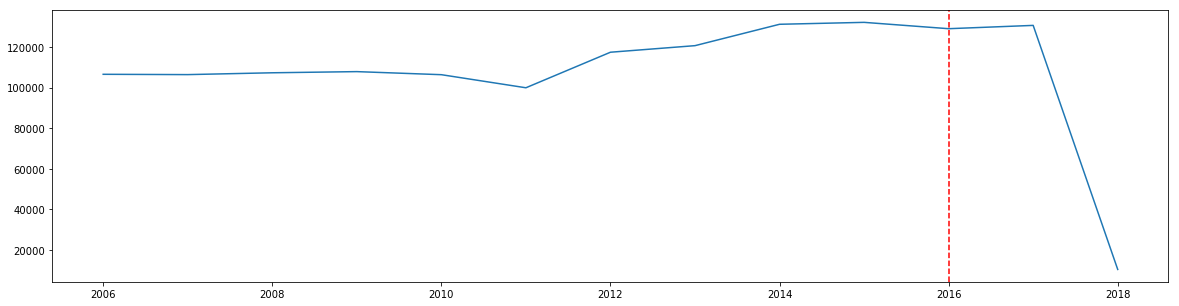

In [13]:
plt.figure(figsize=(20, 5))
all_years = df.groupby('Year')['Year'].count()
plt.plot(all_years.index, all_years)
plt.axvline(x = 2016, c = 'r', ls = '--')
plt.show()

#### month trend 

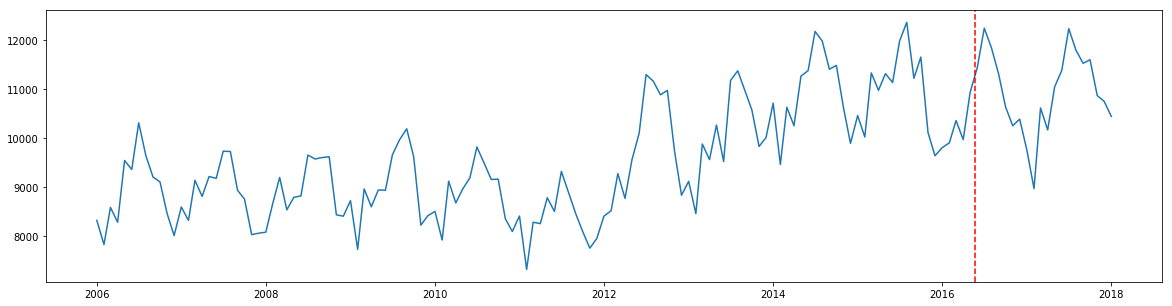

In [12]:
plt.figure(figsize=(20, 5))
all_months = df.groupby(['Year','Month'])['Month'].count()
time = [(lambda year,month: datetime.datetime(year,month,1))(year,month) for year,month in all_months.index.values]
plt.plot(time, all_months)
plt.axvline(open_date, c = 'r', ls = '--')
plt.show()

#### week trend

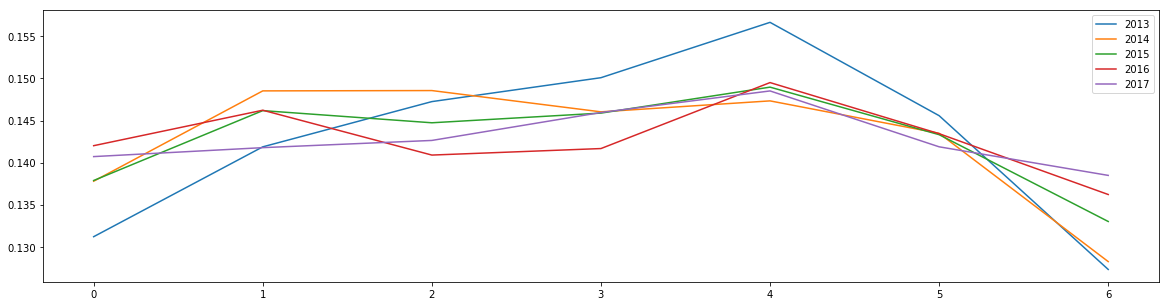

In [10]:
plt.figure(figsize=(20,5))
for i in range (2013,2018):
    dow = df[df['Year'] == i].groupby('Day_Of_Week')['Day_Of_Week'].count() / df[df['Year'] == i].shape[0]
    plt.plot(dow.index, dow, label = i)
plt.legend()
plt.show()


#### date trend

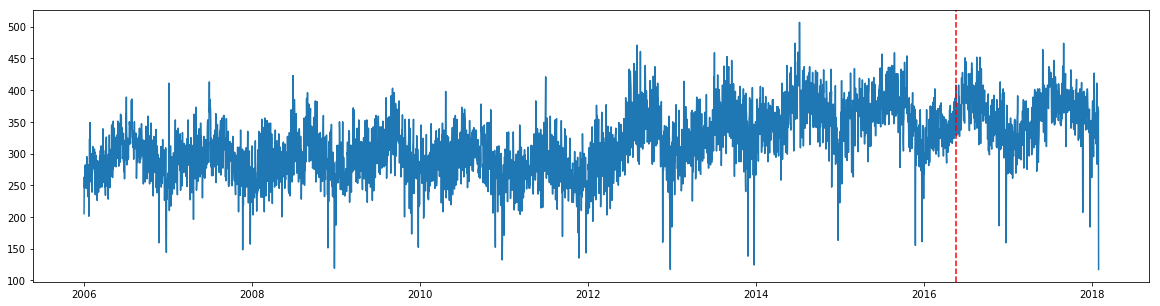

In [11]:
plt.figure(figsize=(20,5))
all_dates = df.groupby('incident date')['incident date'].count()
plt.plot(all_dates.index,all_dates)
plt.axvline(x = open_date,c='r',ls='--')
plt.show()

#### rolling mean 

In [14]:
def create_timeseries(df_main, column = None, value = None, window = 90):
    if column is not None:
        df = df_main[df_main[column] == value]
    else:
        df = df_main.copy()
    raw = df.groupby('incident date')['incident date'].count()
    rolling = raw.rolling(window).mean()
    return plt.plot(rolling.index, rolling, label = value)

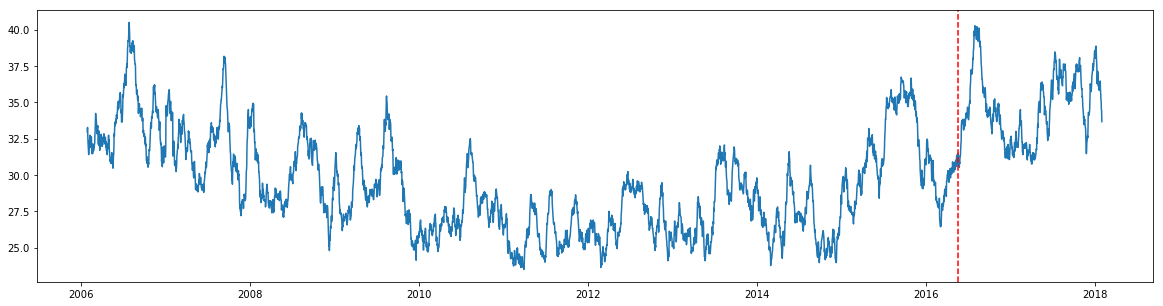

In [15]:
plt.figure(figsize=(20,5))
create_timeseries(df,column='Larceny',value=1,window=30)
plt.axvline(x=open_date,c='r',ls='--')
plt.show()

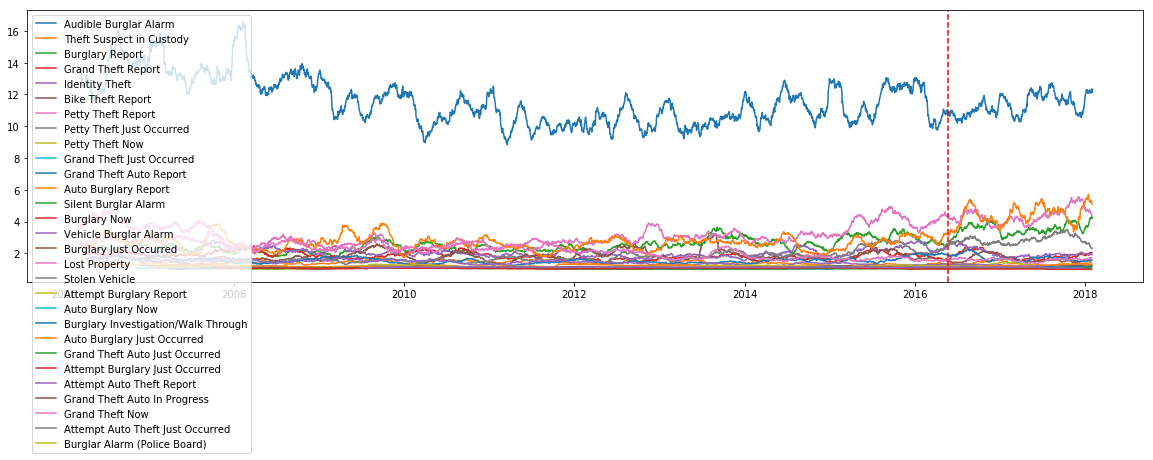

In [30]:
plt.figure(figsize=(20,5))
check = df[df['Larceny'] == 1]
for i in check['Call Type'].unique():
    create_timeseries(check,column='Call Type',value = i, window = 60)
plt.axvline(x=open_date,c='r',ls='--')
plt.legend()
plt.show()


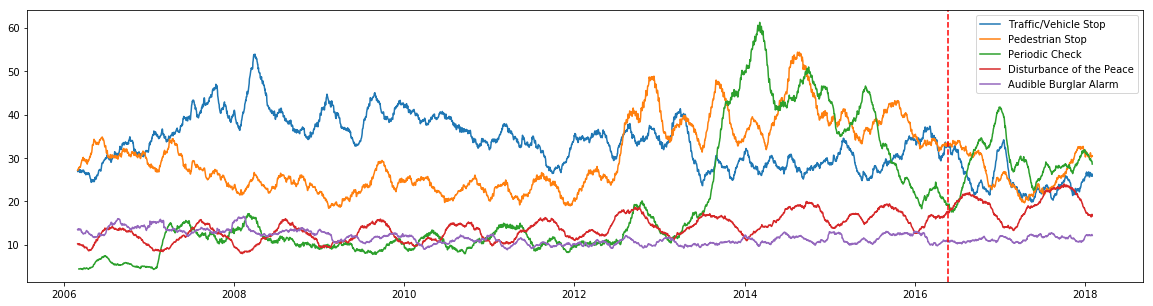

In [29]:
plt.figure(figsize=(20,5))
top_10_type = df['Call Type'].value_counts().index[0:5]
top_10 = df[df['Call Type'].isin(top_10_type)]
top_10_count = top_10.groupby(['Call Type','incident date'])['incident date'].count()
for i in top_10_type:
    plt.plot(top_10_count[i].index,top_10_count[i].rolling(60).mean())
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend(top_10_type)
plt.show()

### location trend - Beat

In [42]:
df['Beat'].value_counts()

B001    251808
A003    146795
A002    124554
B003    120187
A004    106770
B002     86176
B004     70923
A007     69114
A006     68784
A008     55862
0002     50929
0003     38465
A001     36054
A005     35528
0004     35138
0006     30098
0005     26759
0007     26211
9999     17321
0008      9500
0000        23
Name: Beat, dtype: int64

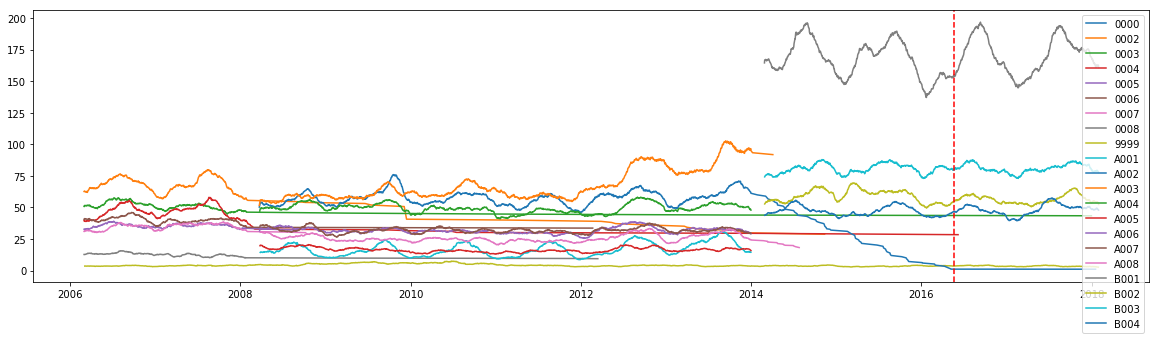

In [67]:
plt.figure(figsize=(20,5))
Beat_type = df[(df['Beat'].notnull())].groupby(['Beat','incident date'])['incident date'].count()
for i in Beat_type.index.get_level_values(0).unique():
    plt.plot(Beat_type[i].index,Beat_type[i].rolling(60).mean())
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend(Beat_type.index.get_level_values(0).unique())
plt.show()

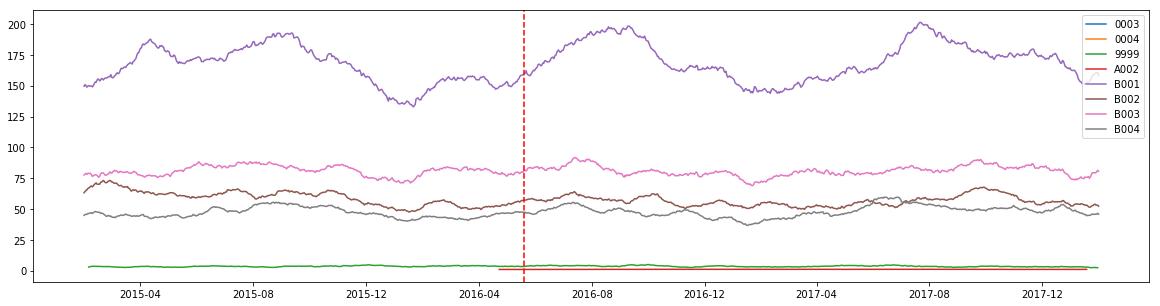

In [69]:
plt.figure(figsize=(20,5))
Beat_type = df[(df['Beat'].notnull()) & (df['Year']>2014)].groupby(['Beat','incident date'])['incident date'].count()
for i in Beat_type.index.get_level_values(0).unique():
    plt.plot(Beat_type[i].index,Beat_type[i].rolling(30).mean())
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend(Beat_type.index.get_level_values(0).unique())
plt.show()

### location - District 

In [131]:
loc = df['Reporting District'].value_counts()
loc = loc[0:10]
loc.index

Index(['03A1', '0B1K', '02D1', '0B1G', '0B3A', '02A1', '0B2A', '04D1', '0B1J',
       '16F1'],
      dtype='object')

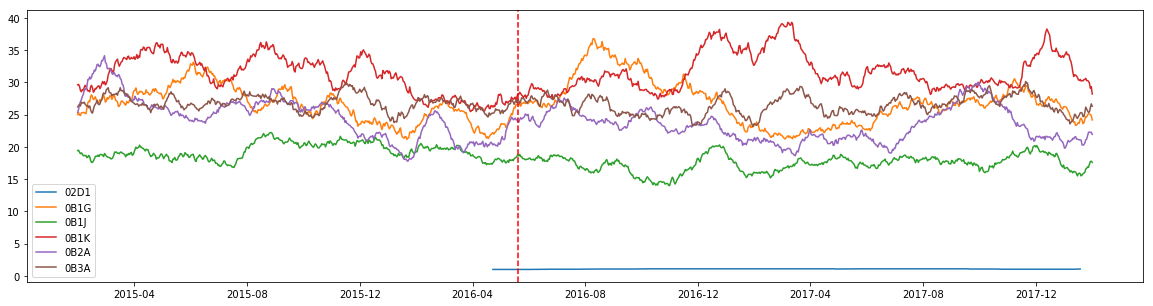

In [133]:
plt.figure(figsize=(20,5))
Dis = df[df['Reporting District'].notnull()]
District_type = Dis[(Dis['Year']>2014)&(Dis['Reporting District'].isin(loc.index))].groupby(['Reporting District','incident date'])['incident date'].count()
for i in District_type.index.get_level_values(0).unique():
    plt.plot(District_type[i].index,District_type[i].rolling(30).mean())
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend(District_type.index.get_level_values(0).unique())
plt.show()

#### B001 is "santa monica pier"

In [136]:
B001 = df[df['Reporting District'] == '0B1G']

In [142]:
B001['Call Type'].value_counts()

Periodic Check                                        6801
Pedestrian Stop                                       4364
Traffic/Vehicle Stop                                  3125
Follow Up                                             1598
Transport Prisoner                                    1375
Assistance Call                                       1174
Found Property                                        1060
Disturbance of the Peace                              1054
At Court                                               943
Status Check                                           848
Administrative Incident                                769
General Parking Problem                                713
Forensics Request - Fingerprint                        677
Traffic Hazard                                         619
Disturbance at a Business                              617
Citizen Flag                                           595
Traffic Control Request - Level 1                      5

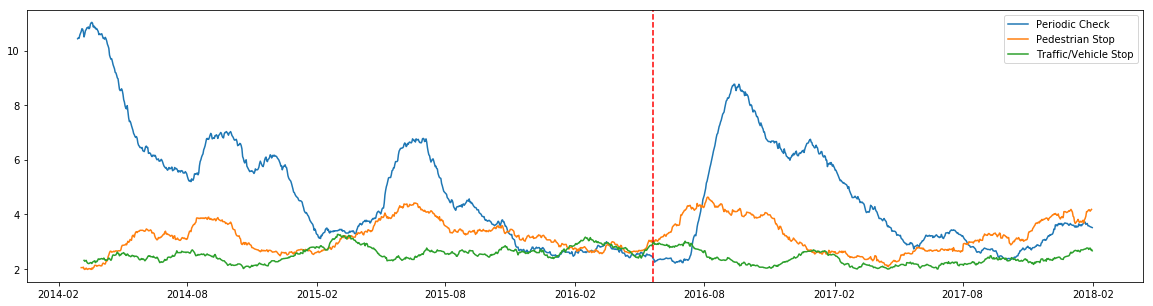

In [140]:
plt.figure(figsize=(20,5))
top_type = B001['Call Type'].value_counts().index[0:3]
top_3 = B001[B001['Call Type'].isin(top_type)]
top_count = top_3.groupby(['Call Type','incident date'])['incident date'].count()
for i in top_type:
    plt.plot(top_count[i].index,top_count[i].rolling(60).mean())
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend(top_type)
plt.show()

In [141]:
B001['Disposition'].value_counts()

Other                       9821
Advisal                     6159
Checks Okay                 4526
Citation/Oth Enforcement    3673
Assist                      3266
File Only                   2853
Gone on Arrival             2581
Cancelled                   2118
Report                      1887
Field Interview             1607
Arrest                       888
Impound                      364
Unfounded                    249
Telephone Report (PSS)        28
Counter Report (PSS)          22
Break Complete                19
POPULATED BY CAD              10
Cancel Prior to Dispatch      10
Advisal/Unfounded (PSS)       10
Gone on Arrival (PSS)          7
New Incident# Issued           2
Name: Disposition, dtype: int64

### twilight concert : http://santamonicapier.org/twilightconcerts/

### Disposition

In [70]:
df['Disposition'].value_counts()

Advisal                     288863
Checks Okay                 190314
Citation/Oth Enforcement    170021
Other                       159799
Gone on Arrival             158313
Report                      102124
Cancelled                    93272
Assist                       92211
Field Interview              41694
Arrest                       38033
File Only                    32478
Unfounded                    18717
Impound                       7363
Telephone Report (PSS)        4958
Counter Report (PSS)          1442
Gone on Arrival (PSS)         1358
POPULATED BY CAD               889
Break Complete                 694
Advisal/Unfounded (PSS)        548
Cancel Prior to Dispatch       157
New Incident# Issued            31
Name: Disposition, dtype: int64